In [1]:
#import in libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import datetime as dt
from matplotlib import dates

# Part 1:

In [142]:
#import the data
data = pd.read_csv('my_lightcurve2.csv')

#assign data columns to different variables
time = data["Time"]
rate = data["Rate"]
error = np.sqrt(data["Rate"]) #assume uncertainty in each rate is just sqrt(rate)
time_sort = np.sort(time)

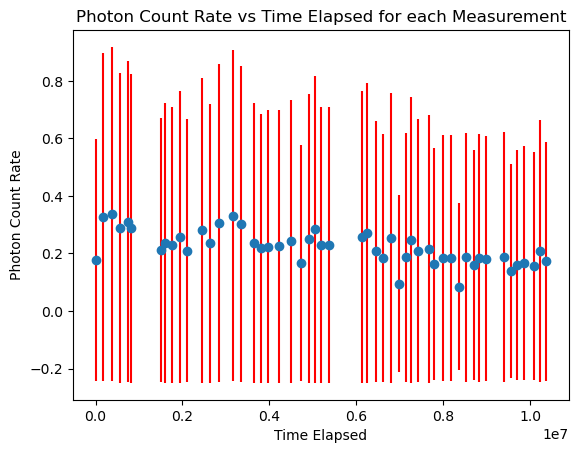

In [143]:
#plot the data (rate vs time) with error bars
plt.errorbar(time, rate, yerr=error.values, ecolor = "red", fmt="o")
plt.ylabel("Photon Count Rate")
plt.xlabel("Time Elapsed")
plt.title("Photon Count Rate vs Time Elapsed for each Measurement")
plt.show()

# Part 2:

In [52]:
#define a linear model
def f_line(x, a,b):
    return a*x + b

In [71]:
#find the best-fit line (linear) for the original data
coefs, covariance = curve_fit(f_line, time, rate, sigma=error)
model = coefs[0]*time_sort + coefs[1]

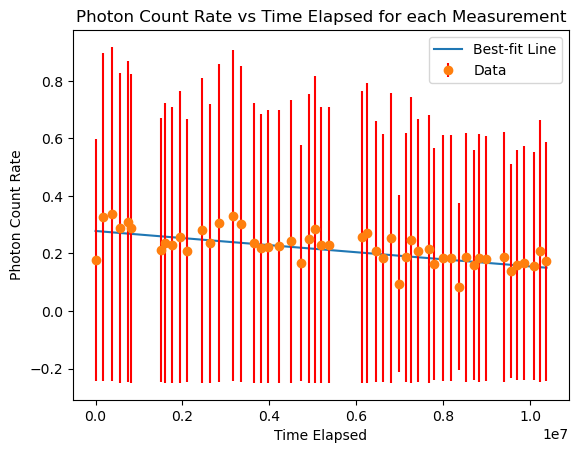

In [144]:
#plot the best-fit line on top of original data
plt.plot(time_sort, model, label="Best-fit Line")
plt.errorbar(time, rate, yerr=error.values, ecolor = "red", fmt="o", label = "Data")
plt.ylabel("Photon Count Rate")
plt.xlabel("Time Elapsed")
plt.title("Photon Count Rate vs Time Elapsed for each Measurement")
plt.legend()
plt.show()

# Part 3:

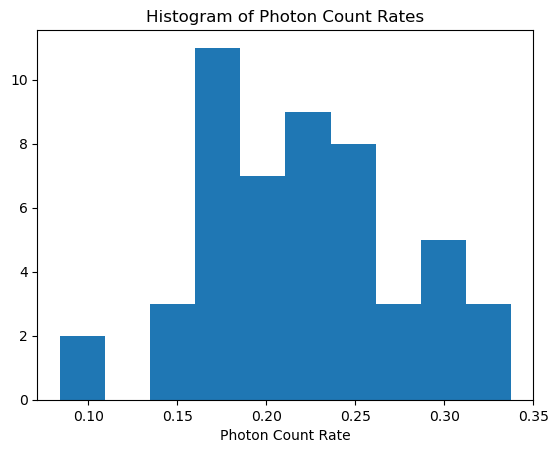

In [86]:
#plot histogram of the rates
plt.hist(rate)
plt.xlabel("Photon Count Rate")
plt.title("Histogram of Photon Count Rates")
plt.show()

# Part 4:

In [88]:
#find simple distribution statistics for rate
observed_mean = np.mean(rate)
observed_std = np.std(rate)
observed_var = np.var(rate)

In [90]:
print("Mean Photon Count Rate:", str(observed_mean))
print("Standard Deviation of Photon Count Rates:", str(observed_std))
print("Variance of Photon Count Rates:", str(observed_var))

Mean Photon Count Rate: 0.2213597113478358
Standard Deviation of Photon Count Rates: 0.05645846364097635
Variance of Photon Count Rates: 0.0031875581166994483


# Part 5:

In [145]:
#Run 1000 Normal Simulations to compare steepness of slope

n = 0 #number of normal simulations with slope equal to or steeper than observed data
for i in range(1000):
    #pull 50 point sample from a normal distribution with matching std and mean to observed data
    randomized_rate = np.random.normal(observed_mean, observed_std, len(rate))
    
    #find best-fit line for these simulated rates
    coefs_rand, covariance_rand = curve_fit(f_line, time, randomized_rate)

    #check if the simulated rates' slope is as steep (or steeper) than the original data's slope
    if(abs(coefs_rand[0]) >= abs(coefs[0])):
        n = n+1
        
print("Fraction of Normal Simulations with Best-Fit Line Slope Steeper than Observed Data:", str(n/1000))

Fraction of Normal Simulations with Best-Fit Line Slope Steeper than Observed Data: 0.0


In [146]:
#Run 1000 Shuffled Simulations to compare steepness of slope

s = 0 #number of shuffled simulations with slope equal to or steeper than observed data
for i in range(1000):
    #shuffle the original rates to match with different times
    shuffled_rate = rate.copy()
    random.shuffle(shuffled_rate)
    
    #find best-fit line for these new simulated points
    coefs_shuff, covariance_shuff = curve_fit(f_line, time, shuffled_rate)
    
    #check if the simulated points' slope is as steep (or steeper) than the original data's slope
    if(abs(coefs_shuff[0]) >= abs(coefs[0])):
        s = s+1
        
print("Fraction of Shuffled Simulations with Best-Fit Line Slope Steeper than Observed Data:", str(s/1000))

Fraction of Shuffled Simulations with Best-Fit Line Slope Steeper than Observed Data: 0.0


# Part 6:

Both of the simulation methods above produce the same results, that 0 (or at least less than 1/1000) of the simulations have a slope that's as steep or steeper than the original data's slope. This means that its **very** unlikely that the trend we see in the original data is a statistical fluctuation (since almost none of the simulations produced such a steep slope), and so we can conclude that the trend is likely real.